# <span style="color:green"> Numerical Simulation Laboratory (NSL) Exercise 9 Results </span>

## 09.1

Write a C++ code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Apply your code to the optimization of a path among 

- <span style="color:blue">32 cities randomly placed **on** a circumference</span>
- <span style="color:blue">32 cities randomly placed **inside** a square</span>

Show your results via:

- <span style="color:red">a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm</span>
- <span style="color:red">a picture of the best path</span>

In [7]:
import numpy as np
from matplotlib import pyplot as plt
import subprocess
import os
import re

NUM_CITIES = 32

# hyperparameters
POP_SIZE = 1000 # population size, should be even
NUM_GENERATIONS = 100
MUTATION_PROB = 0.1 # probability of each mutation
CROSSOVER_PROB = 0.5
POWER_LAW_EXPONENT = 2

path = os.path.join(os.getcwd(), "9/")
#Create imput file to run the TSP program
def create_input_file(pop_size, num_gen, mutation_prob, xover_prob, powerlaw_exp):
    with open(path + "config", 'w') as new_config:
        with open(path + "config.orig", 'r') as template_config:
            config = template_config.read()
            config = re.sub("{POP_SIZE}", str(pop_size), config)
            config = re.sub("{NUM_GENERATIONS}", str(num_gen), config)
            config = re.sub("{MUTATION_PROB}", str(mutation_prob), config)
            config = re.sub("{CROSSOVER_PROB}", str(xover_prob), config)
            config = re.sub("{POWER_LAW_EXPONENT}", str(powerlaw_exp), config)
            new_config.write(config)

In [8]:
# on a circumference (I could just use the angle and use the angle difference as the distance, but this way the two cases can share the same code)
u = np.random.rand(NUM_CITIES)*2*np.pi
cities_circle = np.array((np.cos(u), np.sin(u))).T

# square
cities_square = np.random.rand(NUM_CITIES, 2)

In [4]:
def tsp(cities):
    CITIES_FILE = 'cities'
    np.savetxt(f'9/{CITIES_FILE}', cities, delimiter=' ', fmt='%1.5f')

    create_input_file(POP_SIZE, NUM_GENERATIONS, MUTATION_PROB, CROSSOVER_PROB, POWER_LAW_EXPONENT)
    solution = np.fromstring(subprocess.run(["./main", f"{CITIES_FILE}", "config"], cwd=path, capture_output=True).stdout, dtype=np.int, sep=' ')
    L_best, L_mean = np.loadtxt(path + "cost.out", unpack=True)

    plt.subplots(1,2, figsize=(15,7))
    
    plt.subplot(121)
    plt.plot(cities[solution,0], cities[solution,1], '.-')
    plt.plot(cities[0,0], cities[0,1], 'ro')
    plt.gca().axis('equal')
    plt.axis('off')
    
    plt.subplot(122)
    plt.plot(L_best, label='best')
    plt.plot(L_mean, label='mean')
    plt.xlabel('# gen')
    plt.ylabel('L')
    plt.legend();

We show our results with the following conditions (in both the circle and squared case):
- The size of our population (series of possible travels in this case) set at $1\times10^3$
- The numbers of generations set at 100
- The Mutation probability set at 10% 
- The Crossover probability set at 50%
- The power law exponential for the selection operator $p = 2$
As can be see by the following plot in both cases the best (first member of the population) and mean (first half mean) results decrese with every generation reaching minimum oround 40 generations, the mean results instead start to oscillates without reacing a minimum inside the 100 generations. 

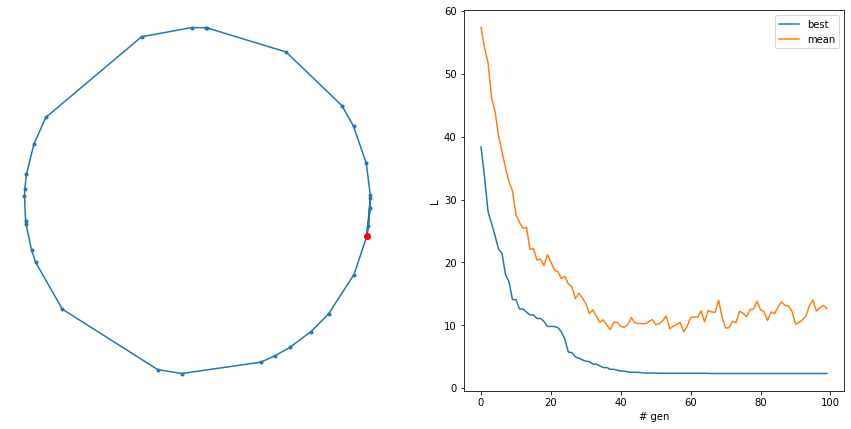

In [5]:
tsp(cities_circle)

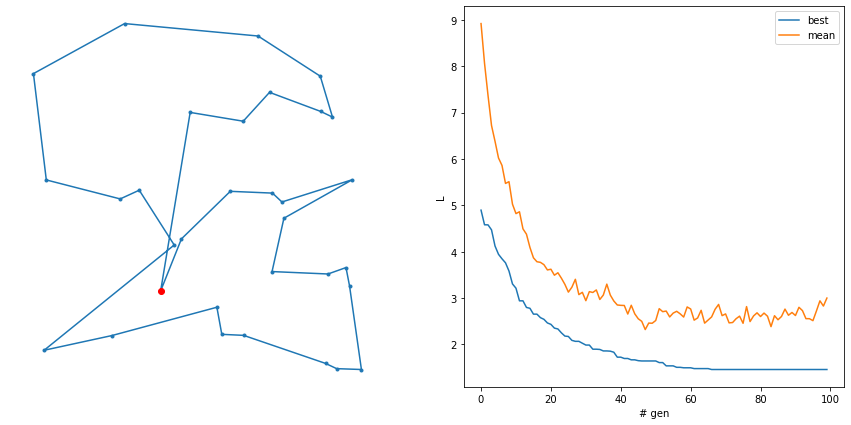

In [6]:
tsp(cities_square)